In [8]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import numpy.linalg as la

from matplotlib.animation import FuncAnimation

In [9]:
def make_sym(A):
    tmp = np.triu(A)
    return tmp + tmp.T

N = 2000
n = 10
period = 40
offset = 2
tensor = np.zeros((N,n,n))
num_elem = n*(n-1)//2
xs, ys = np.triu_indices(n, k=1)
shift = np.zeros((n, n))
for i in range(num_elem):
    shift[xs[i],ys[i]] = -i*offset
for i in range(N):
    tmp = np.sin(i*((2*np.pi)/period) + shift)
    tmp = np.triu(tmp,k=1)
    tmp = tmp + tmp.T
    tmp += np.random.normal(loc=0, scale=1/8, size=(n, n))
    tmp = (tmp+1)/2
    np.fill_diagonal(tmp, 0)
    tensor[i] = tmp

In [10]:
shift

array([[  0.,   0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14., -16.],
       [  0.,   0., -18., -20., -22., -24., -26., -28., -30., -32.],
       [  0.,   0.,   0., -34., -36., -38., -40., -42., -44., -46.],
       [  0.,   0.,   0.,   0., -48., -50., -52., -54., -56., -58.],
       [  0.,   0.,   0.,   0.,   0., -60., -62., -64., -66., -68.],
       [  0.,   0.,   0.,   0.,   0.,   0., -70., -72., -74., -76.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., -78., -80., -82.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -84., -86.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -88.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

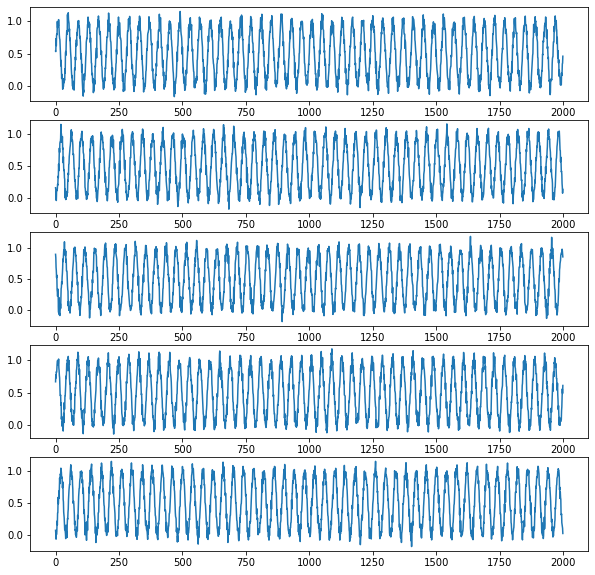

In [11]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(tensor[:,xs[i],ys[i]])

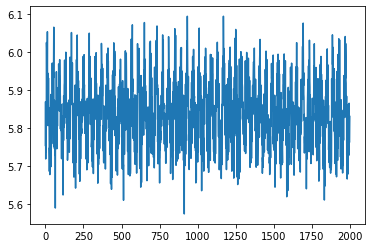

In [12]:
norm = np.array([la.norm(adj) for adj in tensor])
plt.plot(np.arange(len(tensor)), norm)

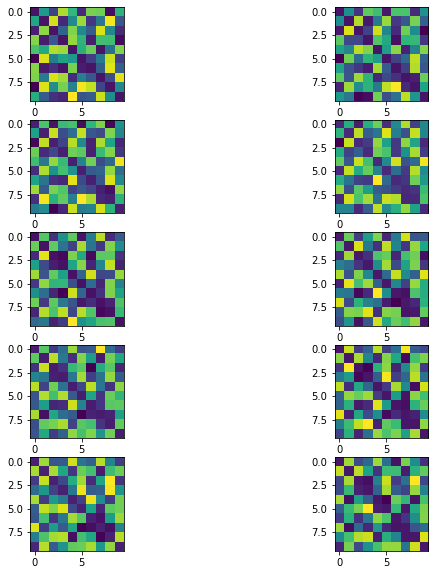

In [13]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(tensor[i])

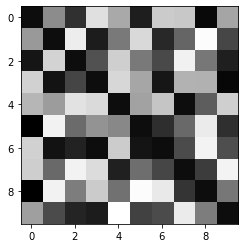

In [14]:
def animate_tensor(tensor, N, save_path):
    global im
    global display_tensor
    display_tensor = tensor
    fig = plt.figure()
    im = plt.imshow(display_tensor[0], cmap=plt.get_cmap("gray"), animated = True)
    ani = FuncAnimation(fig, animate, interval = 100, frames = N, blit=True)
    plt.show()
    #ani.save(save_path)

def animate(i):
    global im
    im.set_array(display_tensor[i])
    return im,

animate_tensor(tensor, N, "adj_mat_cont_noise.gif")

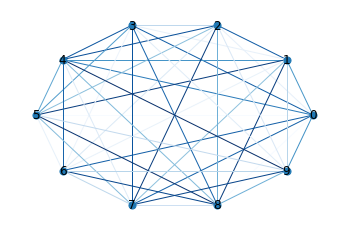

In [15]:
fig, ax = plt.subplots()
def animate(i):
    ax.clear()
    curr_G = nx.from_numpy_matrix(tensor[i])
    edges,weights = zip(*nx.get_edge_attributes(curr_G,'weight').items())
    nx.draw_circular(curr_G, node_size=50, with_labels=True, edge_color=weights, edge_cmap=plt.cm.Blues) #, with_labels=True, node_color=color_map
ani = FuncAnimation(fig, animate, frames = len(tensor), interval=100)
#ani.save("graph_cont_noise.gif")

In [16]:
np.save("deter_graph.npy", tensor)